In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import datetime
from sklearn.linear_model import LinearRegression

In [166]:
'''This is just where I brought in data from an excel spreadsheet.'''
hourlydata = pd.read_excel('fuelbyhour.xlsx')

In [167]:
'''Remove the year as its always the same'''
hourlydata = hourlydata.drop(['DeliveryYear'],axis=1)

In [168]:
'''Fills in the hour for the types as it read as NaN.'''
for j in range(len(hourlydata)-1):
    if math.isnan(hourlydata.iloc[j+1,1]) == True:
        hourlydata.iloc[j+1,1] = hourlydata.iloc[j,1]

,Day,Hour,Fuel,Output
0,2018-01-01,1.0,NUCLEAR,11671
1,NaN,1.0,GAS,1583
2,NaN,1.0,HYDRO,4152
3,NaN,1.0,WIND,992
4,NaN,1.0,SOLAR,0
5,NaN,1.0,BIOFUEL,3
6,NaN,2.0,NUCLEAR,11672
7,NaN,2.0,GAS,1192
8,NaN,2.0,HYDRO,4093
9,NaN,2.0,WIND,1124


In [169]:
'''Fills in the date on the entries.'''
Na = hourlydata['Day'].isna()
for j in range(len(hourlydata)-1):
    if Na[j+1] == True:
        hourlydata.iloc[j+1,0] = hourlydata.iloc[j,0]

In [170]:
'''Gets our date into the right data type'''
hourlydata['Day'] = pd.to_datetime(hourlydata['Day'])

'''Converts from integer to float because python wants that for some reason.'''
for i in range(len(hourlydata)):
    hourlydata.iloc[i,2] = float(hourlydata.iloc[i,2])

In [172]:
'''Puts the data together nicely as "newframe" '''
#newframe = (workingframe.groupby(['Day','Hour','Fuel'])['Output'].mean())

'Puts the data together nicely as "newframe" '

In [173]:
'''Sends the structure to a pickle for use in other scripts'''
#newframe.to_pickle('EnergyOutput')

'Sends the structure to a pickle for use in other scripts'

In [174]:
#Output = pd.read_pickle('EnergyOutput')

In [201]:
#hourlydata = hourlydata.set_index('Day')
Nuclear = hourlydata.where(hourlydata['Fuel']=='NUCLEAR').dropna()
Nuclear = Nuclear.reset_index()
Nuclear = Nuclear.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Nuclear'})

Gas = hourlydata.where(hourlydata['Fuel']=='GAS').dropna()
Gas = Gas.reset_index()
Gas = Gas.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Gas'})

Hydro = hourlydata.where(hourlydata['Fuel']=='HYDRO').dropna()
Hydro = Hydro.reset_index()
Hydro = Hydro.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Hydro'})

Wind = hourlydata.where(hourlydata['Fuel']=='WIND').dropna()
Wind = Wind.reset_index()
Wind = Wind.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Wind'})

Solar = hourlydata.where(hourlydata['Fuel']=='SOLAR').dropna()
Solar = Solar.reset_index()
Solar = Solar.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Solar'})

Biofuel = hourlydata.where(hourlydata['Fuel']=='BIOFUEL').dropna()
Biofuel = Biofuel.reset_index()
Biofuel = Biofuel.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Biofuel'})

Fuel = Nuclear.join(Gas)
Fuel = Fuel.join(Hydro)
Fuel = Fuel.join(Wind)
Fuel = Fuel.join(Solar)
Fuel = Fuel.join(Biofuel)
Fuel['Production'] = Fuel['Nuclear']+Fuel['Gas']+Fuel['Hydro']+Fuel['Wind']+Fuel['Solar']+Fuel['Biofuel']

In [179]:
'''Loads in and reformats the price data to be merged with the production data.'''
Price = pd.read_csv('price.csv')
Price = Price[['Date','Hour','HOEP']].rename(columns={'Date':'Day'})
Price['Day'] = pd.to_datetime(Price['Day'])
Price['Hour'] = pd.to_numeric(Price['Hour'])
Price = Price.set_index(['Day','Hour'])

In [203]:
Fuel = Fuel.join(Price)

In [183]:
'''Exports this dataframe as a pickle hell yeah gamers B)'''
#Fuel.to_pickle('MoreFuelMoreProblems')

In [195]:
'''Loads in a csv with Power demand and **Dab** formats it for merging with the mega dataframe'''
Demand = pd.read_csv('2018Demand.csv')
Demand['Day'] = pd.to_datetime(Demand['Date'])
Demand['Ontario'] = pd.to_numeric(Demand['Ontario Demand'])
Demand['Market'] = pd.to_numeric(Demand['Market Demand'])
Demand['Hour'] = pd.to_numeric(Demand['Hour'])
Demand = Demand.drop(['Date','Ontario Demand','Market Demand'],axis=1)
Demand = Demand.set_index(['Day','Hour'])

In [204]:
MasterFrame = Fuel.join(Demand)

In [205]:
MasterFrame.to_pickle('One_frame_to_rule_them_all')

In [2]:
MasterFrame = pd.read_pickle('One_frame_to_rule_them_all')

,Nuclear,Gas,Hydro,Wind,Solar,Biofuel,Production,HOEP,Ontario,Market
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,10232.749772,1128.146347,4047.396804,1222.796461,59.043151,36.682763,16726.815297,22.444435,15689.103425,17766.184132
std,29.176403,487.389151,522.779083,100.748998,71.984570,17.893737,1165.248711,7.720449,1585.442123,1394.747858
min,10167.326027,378.945205,3254.364384,1027.720548,0.832877,11.117808,14895.810959,9.112247,13026.843836,15478.813699
25%,10226.300685,683.568493,3538.080822,1166.810274,0.889726,17.643836,15515.830137,14.822712,14228.578082,16420.100685
50%,10247.150685,1235.983562,4227.757534,1240.354795,11.480822,40.264384,17143.675342,23.985808,16338.745205,18289.269863
75%,10251.125342,1519.208904,4295.578767,1284.495890,127.772603,51.325342,17536.725342,28.820712,16628.292466,18657.236301
max,10259.241096,1766.273973,4833.334247,1385.791781,183.106849,59.772603,18223.243836,32.762740,17769.180822,19602.482192


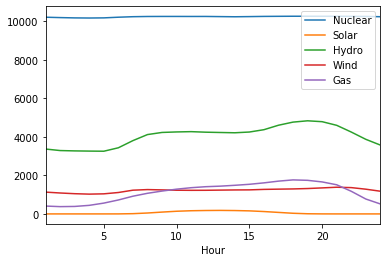

In [19]:
hourmeans = MasterFrame.groupby(['Hour']).mean()
hourmeans[['Nuclear','Solar','Hydro','Wind','Gas']].plot()
hourmeans.describe()

In [282]:
P = LinearRegression()
P = P.fit(MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).reset_index(drop=True), MasterFrame['HOEP'].reset_index(drop=True))
P.coef_
#P.score(MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).reset_index(drop=True), MasterFrame['HOEP'].reset_index(drop=True))

array([ 0.00032193,  0.00974736,  0.00789546, -0.00129893, -0.02063196,
        0.00509855])

In [5]:
MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).dtypes

Nuclear    float64
Gas        float64
Hydro      float64
Wind       float64
Solar      float64
Biofuel    float64
dtype: object

In [9]:
MasterFrame.describe()

,Nuclear,Gas,Hydro,Wind,Solar,Biofuel,Production,HOEP,Ontario,Market
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,10232.749772,1128.146347,4047.396804,1222.796461,59.043151,36.682763,16726.815297,22.444435,15689.103425,17766.184132
std,638.200251,1124.005622,766.470377,936.995985,90.579479,50.455115,1830.242634,22.131897,2318.553939,2133.476285
min,7986.000000,72.000000,2355.000000,2.000000,0.000000,0.000000,12385.000000,-4.390000,10541.000000,13074.000000
25%,9707.250000,285.000000,3427.000000,432.000000,0.000000,1.000000,15376.000000,6.000000,13964.000000,16194.000000
50%,10290.000000,702.000000,4035.000000,958.000000,1.000000,25.000000,16580.500000,17.045000,15564.500000,17586.000000
75%,10712.000000,1613.000000,4641.250000,1872.250000,95.000000,32.000000,17908.000000,34.362500,17236.000000,19137.000000
max,12005.000000,5589.000000,6091.000000,4028.000000,336.000000,479.000000,23692.000000,365.640000,23240.000000,24490.000000


In [5]:
#this function takes in an array of mean value data and an int defining the length of the simulation, and then computes
#a random walk of the length of the integer. 
def meanwalk(series,integer):
    value = np.zeros(integer)
    std = float(series.std())
    value[0] = max(series.iloc[0] + std*(2*np.random.random_sample()-1),0)
    for i in range(integer-1):
        h = (i+1)%24
        delta = (series.iloc[h] - value[i])/std
        if delta > 0:
            if np.random.random_sample() > delta:
                value[i+1] = max(value[i] + np.random.normal(loc=0,scale=delta*std+.1),0)
            else:
                value[i+1] = max(value[i] + np.random.normal(loc=delta*std/2,scale=delta*std+.1),0)
        else:
            if np.random.random_sample() > -delta:
                value[i+1] = max(value[i] + np.random.normal(loc=0,scale=-delta*std+.1),0)
            else:
                value[i+1] = max(value[i] + np.random.normal(loc=delta*std/2,scale=-delta*std+.1),0)   
    return value

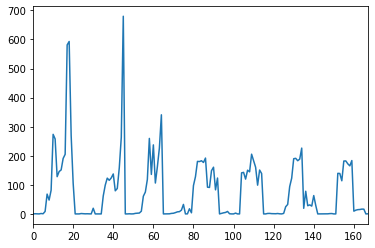

In [35]:
randomsolar = meanwalk(hourmeans['Solar'],7*24)
pd.Series(randomsolar).plot()

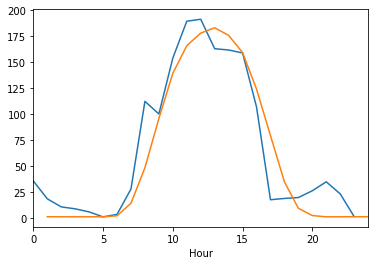

In [18]:
mean = np.array(randomsolar)
for i in range(365):
    mean = (mean+meanwalk(hourmeans['Solar'],24))/(2)
pd.Series(mean).plot()
hourmeans['Solar'].plot()

In [10]:
def meanwalk2(series,integer):
    value = np.zeros(integer)
    std = float(series.std())
    value[0] = max(series.iloc[0] + std*(np.random.random_sample()-1),0)
    for i in range(integer-1):
        h = (i+1)%24
        delta = (series.iloc[h] - value[i])/std
        if delta > 0:
            if np.random.random_sample() > delta:
                value[i+1] = max(value[i] + np.random.uniform(-abs(np.sqrt(2)*delta*std),abs(np.sqrt(2)*delta*std)),0)
            else:
                value[i+1] = max(value[i] + np.random.uniform(abs(delta*std/2)-abs(np.sqrt(2)*delta*std),abs(delta*std/2)+abs(np.sqrt(2)*delta*std)),0)
        else:
            if np.random.random_sample() > -delta:
                value[i+1] = max(value[i] + np.random.uniform(-abs(np.sqrt(2)*delta*std),value[i]+abs(np.sqrt(2)*delta*std)),0)
            else:
                value[i+1] = max(value[i] + np.random.uniform((-abs(delta*std/2))-abs(np.sqrt(2)*delta*std),-abs(delta*std/2)+abs(np.sqrt(2)*delta*std)),0)
        
    return value